In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, f_oneway
from scipy.stats import skew
from scipy.stats import variation
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("р. Ахтычай-с. Ахты.xlsx")#,index_col="№ п/п")

In [3]:
df

,№ п/п,год,максимальный
0,1,1926,92.7
1,2,1927,98.3
2,3,1928,42.0
3,4,1929,107.0
4,5,1930,56.0
...,...,...,...
77,78,2016,96.8
78,79,2017,134.0
79,80,2018,91.1
80,81,2019,96.5


In [4]:
# Посчитаем сначала статистические характеристики:
length_of_range = len(df['максимальный'])
mean = np.mean(df['максимальный'])
std_dev = np.std(df['максимальный'])
coeff_of_variation = variation(df['максимальный'])
coeff_of_assimetria = skew(df['максимальный'])
minimum = min(df['максимальный'])
maximum = max(df['максимальный'])
# Посчитамем ошибки для среднего, вариации, асимметрии:
mistake_of_discharge = (coeff_of_variation / np.sqrt(length_of_range)) * 100
mistake_of_variation = ((1 / (length_of_range + 4 * coeff_of_variation**2)) * 
                        np.sqrt(length_of_range * (1 + coeff_of_variation**2) / 2) *100)

mistake_of_assimetria = (1 / coeff_of_assimetria * 
                        np.sqrt(6 / length_of_range * (1 + 6 * coeff_of_variation**2 + 5 * coeff_of_variation**4)) * 100)
Cs_Cv = coeff_of_assimetria / coeff_of_variation

In [5]:
# Вывод на экран стат. хар-к:
print("длина ряда: ", length_of_range)
print("среднее: ", round(mean,2))
print("CKO: ", round(std_dev,2))
print("Cv: ", round(coeff_of_variation,2))
print("Cs: ", round(coeff_of_assimetria,2))
print(f"𝜎𝑄: {round(mistake_of_discharge,2)} %")
print(f"𝜎𝐶𝑣: {round(mistake_of_variation,2)} %")
print(f"𝜀𝐶𝑠:  {round(mistake_of_assimetria,1)} %")

print("Cs/Cv: ", round(Cs_Cv,2))
print("Cs/Cv: ", round(Cs_Cv,0))

print("min: ", round(minimum,2))
print("max: ", round(maximum,2))

длина ряда:  82
среднее:  93.67
CKO:  74.3
Cv:  0.79
Cs:  4.24
𝜎𝑄: 8.76 %
𝜎𝐶𝑣: 9.67 %
𝜀𝐶𝑠:  16.6 %
Cs/Cv:  5.34
Cs/Cv:  5.0
min:  32.5
max:  550.0


In [6]:
# Посчитаем коэффициент детерминации:
# Определите зависимую переменную (Y) и независимую переменную (X)
Y = df['максимальный']
X = df['№ п/п']
X_mean = np.mean(X)
Y_mean = np.mean(Y)

beta1 = np.sum((X - X_mean) * (Y - Y_mean)) / np.sum((X - X_mean) ** 2)
beta0 = Y_mean - beta1 * X_mean

# Рассчитываем прогнозные значения
predicted_values = beta0 + beta1 * X

# Вычисляем сумму квадратов регрессии (SSR)
ssr = np.sum((predicted_values - Y_mean) ** 2)
# Вычисляем сумму квадратов ошибок (SSE)
sse = np.sum((Y - predicted_values) ** 2)
# Вычисляем общую сумму квадратов (SST)
sst = ssr + sse

In [7]:
# Получаем коэффициент детерминации (R-squared)
r_squared = ssr / sst
# Получим коэффициент корреляции:
R = np.sqrt(r_squared)
# Получим сигму R:
sigma_R = np.sqrt((1 - r_squared) / (length_of_range - 2))
# Получим R / сигму R: 
R_to_sigmaR = R / sigma_R

In [8]:
# Посчитаем теперь критическое значение критерия Стьюдента:
from scipy import stats
# Уровень значимости (alpha)
alpha = 0.05

# Степени свободы:
degrees_of_freedom = length_of_range - 2  # Замените H18 на нужное вам значение

# Вычисление критического значения t-критерия для двустороннего теста
critical_value = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)

In [9]:
print(f'R-squared: {round(r_squared,3)}')
print(f'R: {round(R,2)}')
print(f'𝜎R: {round(sigma_R,2)}')
print(f'R/𝜎R: {round(R_to_sigmaR,2)}')
print(f'Критическое значение t: {round(critical_value,2)}')

if R_to_sigmaR > critical_value:
    print('\n',"Тренд значимый.", '\n\t'
          "'H0: R = 0::: ОПРОВЕРГАЕТСЯ!!!!!.'")
else:
        print("Не опровергается")

R-squared: 0.028
R: 0.17
𝜎R: 0.11
R/𝜎R: 1.53
Критическое значение t: 1.99
Не опровергается


In [10]:
# Разбить ряд на две половины для проверки на однородность: 
half_length = len(df['максимальный']) // 2
first_half = df['максимальный'][:half_length]
second_half = df['максимальный'][half_length:]

In [11]:
# Двухвыборочный t-тест с одинаковыми дисперсиями:
from scipy import stats

t_stat = stats.ttest_ind(first_half, second_half)
 
print(f"t-статистика: {round(t_stat[0],2)}")
print(f"Критическое значение t: {round(critical_value,2)}")

if abs(t_stat[0]) > critical_value:
    print("\nОтвергаем нулевую гипотезу: различия статистически значимы")
else:
    print("Не отвергаем нулевую гипотезу: различия не являются статистически значимыми")

t-статистика: -2.09
Критическое значение t: 1.99

Отвергаем нулевую гипотезу: различия статистически значимы


In [12]:
# Двухвыборочный F-тест для дисперсии:

from scipy import stats

# Вычисляем F-статистику
variance1 = np.var(first_half, ddof=1)  
variance2 = np.var(second_half, ddof=1)  
 
# Вычисляем F-статистику
if variance1 > variance2:
    F_statistic = variance1 / variance2
else:
    F_statistic = variance2 / variance1


# Определяем степени свободы для F-распределения
df1 = len(first_half) - 1  # Степени свободы для первой выборки
df2 = len(second_half) - 1  # Степени свободы для второй выборки
alpha = 0.025

# Вычисляем p-значение для F-теста
F_critical = stats.f.ppf(1-alpha, df1, df2)

print(f'F-статистика: {round(F_statistic,2)}')
print(f'F критическое одностороннее: {round(F_critical,2)} \n')

if F_critical < F_statistic:
    print("Отвергаем нулевую гипотезу: дисперсии статистически различны")
else:
    print("Не отвергаем нулевую гипотезу: дисперсии не статистически различны")


F-статистика: 10.52
F критическое одностороннее: 1.88 

Отвергаем нулевую гипотезу: дисперсии статистически различны


In [13]:
# Посчитаем аналитические координаты Гумбеля:
df_for_summary = pd.DataFrame()
sorted_df = df.sort_values(by='максимальный', ascending=False).reset_index(drop=True)
df_for_summary['Ранжированные Qв, м3/с'] = sorted_df['максимальный']

In [14]:
df_for_summary

,"Ранжированные Qв, м3/с"
0,550.0
1,448.0
2,208.0
3,205.0
4,199.0
...,...
77,40.0
78,38.9
79,37.2
80,36.9


In [15]:
df_for_summary['№ п/п'] = df['№ п/п']
df_for_summary['p=m/(n+1)*100'] = round(df_for_summary['№ п/п'] / (length_of_range + 1) * 100,2)

In [16]:
df_for_summary

,"Ранжированные Qв, м3/с",№ п/п,p=m/(n+1)*100
0,550.0,1,1.20
1,448.0,2,2.41
2,208.0,3,3.61
3,205.0,4,4.82
4,199.0,5,6.02
...,...,...,...
77,40.0,78,93.98
78,38.9,79,95.18
79,37.2,80,96.39
80,36.9,81,97.59


In [17]:
df_for_summary['P'] = df_for_summary['p=m/(n+1)*100'] / 100

In [18]:
df_for_summary['1 - P'] = 1 - df_for_summary['P'] 

In [19]:
df_for_summary['g'] = round(-np.log(-np.log(df_for_summary['1 - P'])),2)

In [20]:
df_for_summary

,"Ранжированные Qв, м3/с",№ п/п,p=m/(n+1)*100,P,1 - P,g
0,550.0,1,1.20,0.0120,0.9880,4.42
1,448.0,2,2.41,0.0241,0.9759,3.71
2,208.0,3,3.61,0.0361,0.9639,3.30
3,205.0,4,4.82,0.0482,0.9518,3.01
4,199.0,5,6.02,0.0602,0.9398,2.78
...,...,...,...,...,...,...
77,40.0,78,93.98,0.9398,0.0602,-1.03
78,38.9,79,95.18,0.9518,0.0482,-1.11
79,37.2,80,96.39,0.9639,0.0361,-1.20
80,36.9,81,97.59,0.9759,0.0241,-1.32


In [21]:
filtered_df_upper = df_for_summary[(df_for_summary['p=m/(n+1)*100'] >= 0) & (df_for_summary['p=m/(n+1)*100'] <= 20)]
filtered_df_lower = df_for_summary[(df_for_summary['p=m/(n+1)*100'] > 20) & (df_for_summary['p=m/(n+1)*100'] <= 100)]

In [22]:
filtered_df_upper

,"Ранжированные Qв, м3/с",№ п/п,p=m/(n+1)*100,P,1 - P,g
0,550.0,1,1.20,0.0120,0.9880,4.42
1,448.0,2,2.41,0.0241,0.9759,3.71
2,208.0,3,3.61,0.0361,0.9639,3.30
3,205.0,4,4.82,0.0482,0.9518,3.01
4,199.0,5,6.02,0.0602,0.9398,2.78
5,191.0,6,7.23,0.0723,0.9277,2.59
6,163.0,7,8.43,0.0843,0.9157,2.43
7,137.0,8,9.64,0.0964,0.9036,2.29
8,135.0,9,10.84,0.1084,0.8916,2.17
9,134.0,10,12.05,0.1205,0.8795,2.05


In [23]:
num_samples = len(filtered_df_upper)
num_samples_to_use = filtered_df_upper


# Найдем координаты Гумбеля для верхней части:
mean_x = filtered_df_upper['g'].mean()
mean_y = filtered_df_upper['Ранжированные Qв, м3/с'].mean()

# Вычисляем суммы разностей от средних значений
sum_xy = (filtered_df_upper['g'] * filtered_df_upper['Ранжированные Qв, м3/с']).sum()
sum_xx = (filtered_df_upper['g'] * filtered_df_upper['g']).sum()
sum_x = filtered_df_upper['g'].sum()
sum_y = filtered_df_upper['Ранжированные Qв, м3/с'].sum()

# Вычисляем коэффициенты уравнения регрессии
slope_upper = (sum_xy - (sum_x * sum_y / num_samples)) / (sum_xx - (sum_x * sum_x / num_samples))
intercept_upper = mean_y - slope_upper * mean_x

print(f'Уравнение регрессии: Y = {round(slope_upper,4)} * X + {round(intercept_upper,4)}')

Уравнение регрессии: Y = 142.6131 * X + -157.9471


In [24]:
coordinates_upper = pd.DataFrame()
coordinates_upper['P_аналитич'] = [0.01,0.1,0.3,0.5,1,2,3,5,10,20]
coordinates_upper['1-P'] = 1 - coordinates_upper['P_аналитич'] / 100
coordinates_upper['g'] = round(-np.log(-np.log(coordinates_upper['1-P'])),2)
coordinates_upper['Qp'] = round(slope_upper * coordinates_upper['g'] + intercept_upper,2)

In [25]:
coordinates_upper

,P_аналитич,1-P,g,Qp
0,0.01,0.9999,9.21,1155.52
1,0.10,0.9990,6.91,827.51
2,0.30,0.9970,5.81,670.63
3,0.50,0.9950,5.30,597.90
4,1.00,0.9900,4.60,498.07
5,2.00,0.9800,3.90,398.24
6,3.00,0.9700,3.49,339.77
7,5.00,0.9500,2.97,265.61
8,10.00,0.9000,2.25,162.93
9,20.00,0.8000,1.50,55.97


## __Теперь то же самое для нижней части кривой__

In [26]:
num_samples = len(filtered_df_lower)
num_samples_to_use = filtered_df_lower


# Найдем координаты Гумбеля для верхней части:
mean_x = filtered_df_lower['g'].mean()
mean_y = filtered_df_lower['Ранжированные Qв, м3/с'].mean()

# Вычисляем суммы разностей от средних значений
sum_xy = (filtered_df_lower['g'] * filtered_df_lower['Ранжированные Qв, м3/с']).sum()
sum_xx = (filtered_df_lower['g'] * filtered_df_lower['g']).sum()
sum_x = filtered_df_lower['g'].sum()
sum_y = filtered_df_lower['Ранжированные Qв, м3/с'].sum()

# Вычисляем коэффициенты уравнения регрессии
slope_lower = (sum_xy - (sum_x * sum_y / num_samples)) / (sum_xx - (sum_x * sum_x / num_samples))
intercept_lower = mean_y - slope_lower * mean_x

print(f'Уравнение регрессии: Y = {round(slope_lower,4)} * X + {round(intercept_lower,4)}')

filtered_df_lower

Уравнение регрессии: Y = 25.0108 * X + 67.5626


,"Ранжированные Qв, м3/с",№ п/п,p=m/(n+1)*100,P,1 - P,g
16,106.0,17,20.48,0.2048,0.7952,1.47
17,102.0,18,21.69,0.2169,0.7831,1.41
18,98.3,19,22.89,0.2289,0.7711,1.35
19,98.0,20,24.10,0.2410,0.7590,1.29
20,96.8,21,25.30,0.2530,0.7470,1.23
...,...,...,...,...,...,...
77,40.0,78,93.98,0.9398,0.0602,-1.03
78,38.9,79,95.18,0.9518,0.0482,-1.11
79,37.2,80,96.39,0.9639,0.0361,-1.20
80,36.9,81,97.59,0.9759,0.0241,-1.32


In [27]:
coordinates_lower = pd.DataFrame()
coordinates_lower['P_аналитич'] = [25,30,40,50,60,70,75,80,90,95,97,99,99.5,99.7,99.9,99.99]
coordinates_lower['1-P'] = 1 - coordinates_lower['P_аналитич'] / 100
coordinates_lower['g'] = round(-np.log(-np.log(coordinates_lower['1-P'])),2)
coordinates_lower['Qp'] = round(slope_lower * coordinates_lower['g'] + intercept_lower,2)

In [28]:
coordinates_lower

,P_аналитич,1-P,g,Qp
0,25.00,0.7500,1.25,98.83
1,30.00,0.7000,1.03,93.32
2,40.00,0.6000,0.67,84.32
3,50.00,0.5000,0.37,76.82
4,60.00,0.4000,0.09,69.81
5,70.00,0.3000,-0.19,62.81
6,75.00,0.2500,-0.33,59.31
7,80.00,0.2000,-0.48,55.56
8,90.00,0.1000,-0.83,46.80
9,95.00,0.0500,-1.10,40.05


In [29]:
from scipy.stats import norm

# Задайте уровень вероятности (от 0 до 1)
probability = 0.029  # Пример: 95% вероятности

# Задайте среднее и стандартное отклонение
mean = 0  # Среднее значение
std_dev = 1  # Стандартное отклонение

# Вычислите обратное значение нормального распределения (квантиль)
inverse_value = norm.ppf(probability, loc=mean, scale=std_dev)

# Выведите результат
print("Обратное значение нормального распределения:", inverse_value)

x_empiric = norm.ppf(df_for_summary['P'], loc=mean, scale=std_dev)    

Обратное значение нормального распределения: -1.8956979239918386


In [30]:
x_empiric

array([-2.25712924, -1.97560087, -1.79785493, -1.66256271, -1.55309684,
       -1.45887324, -1.37671623, -1.30234054, -1.23508197, -1.17249096,
       -1.11465101, -1.05987823, -1.00853019, -0.95931516, -0.91270065,
       -0.86762437, -0.82459775, -0.78270562, -0.74247433, -0.70308946,
       -0.66507895, -0.62770074, -0.59147829, -0.55572334, -0.5209523 ,
       -0.48651792, -0.45292882, -0.41984321, -0.38694085, -0.35471915,
       -0.32259762, -0.2910671 , -0.25956414, -0.22857404, -0.19754637,
       -0.16696193, -0.13627992, -0.10597776, -0.07552124, -0.04538555,
       -0.01504034,  0.01504034,  0.04538555,  0.07552124,  0.10597776,
        0.13627992,  0.16696193,  0.19754637,  0.22857404,  0.25956414,
        0.2910671 ,  0.32259762,  0.35471915,  0.38694085,  0.41984321,
        0.45292882,  0.48651792,  0.5209523 ,  0.55572334,  0.59147829,
        0.62770074,  0.66507895,  0.70308946,  0.74247433,  0.78270562,
        0.82459775,  0.86762437,  0.91270065,  0.95931516,  1.00

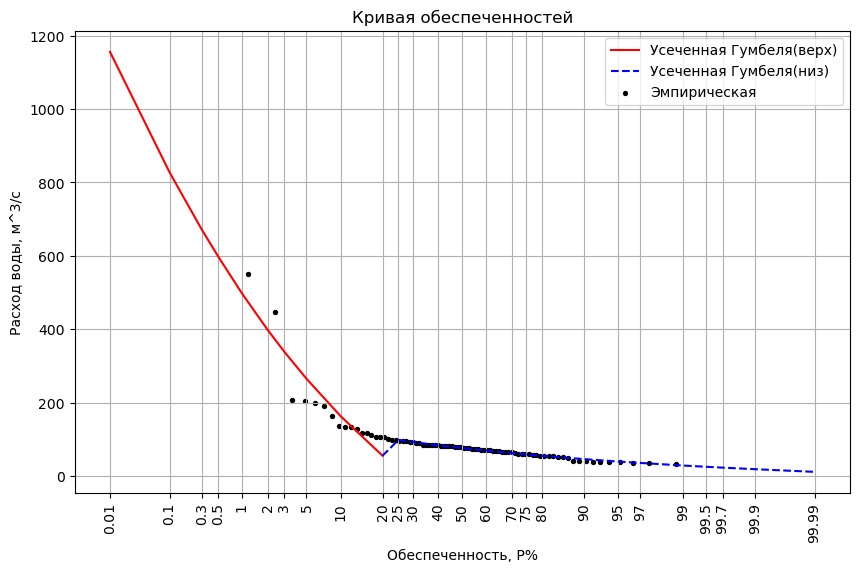

In [31]:
x_coord = [-3.719016485, -3.090232306, -2.747781385, -2.575829304, -2.326347874,-2.053748911,-1.880793608, -1.644853627, -1.281551566, -0.841621234, -0.67448975, -0.524400513, -0.253347103, 0, 0.253347103, 0.524400513, 0.67448975, 0.841621234, 1.281551566, 1.644853627, 1.880793608, 2.326347874, 2.575829304, 2.747781385, 3.090232306, 3.719016485]
y_coord = pd.concat([coordinates_upper['Qp'], coordinates_lower['Qp']])

xticks_combined = [0.01, 0.1, 0.3, 0.5, 1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 60, 70, 75, 80, 90, 95, 97, 99, 99.5, 99.7, 99.9, 99.99]

plt.figure(figsize=(10, 6))
plt.plot(x_coord[0:10], y_coord[0:10], label="Усеченная Гумбеля(верх)", c='red')
plt.plot(x_coord[9:], y_coord[9:], label="Усеченная Гумбеля(низ)", linestyle="--", c='blue')

plt.scatter(x_empiric,df_for_summary['Ранжированные Qв, м3/с'], label="Эмпирическая",s=8,c='black')

plt.xlabel("Обеспеченность, Р%")
plt.ylabel("Расход воды, м^3/с")
plt.title("Кривая обеспеченностей")

plt.xticks(x_coord, xticks_combined, rotation=90)

y_tick_interval = 1  # Установить нужный интервал !!!
min_value_y = 0
max_value_y = max(y_coord)
ytick_positions = list(range(int(min_value_y), int(max_value_y) + 2, y_tick_interval))
#plt.yticks(ytick_positions)

plt.legend()
plt.grid()
plt.show()

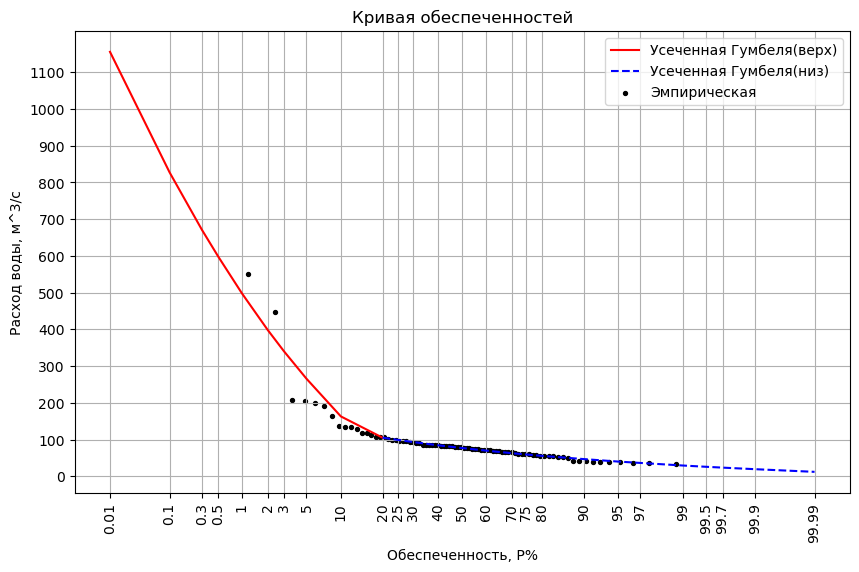

In [32]:

coordinates_upper['Qp'][9] = round(slope_lower * coordinates_upper['g'].iloc[9] + intercept_lower,2)

x_coord = [-3.719016485, -3.090232306, -2.747781385, -2.575829304, -2.326347874,-2.053748911,-1.880793608, -1.644853627, -1.281551566, -0.841621234, -0.67448975, -0.524400513, -0.253347103, 0, 0.253347103, 0.524400513, 0.67448975, 0.841621234, 1.281551566, 1.644853627, 1.880793608, 2.326347874, 2.575829304, 2.747781385, 3.090232306, 3.719016485]
y_coord = pd.concat([coordinates_upper['Qp'], coordinates_lower['Qp']])

xticks_combined = [0.01, 0.1, 0.3, 0.5, 1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 60, 70, 75, 80, 90, 95, 97, 99, 99.5, 99.7, 99.9, 99.99]

plt.figure(figsize=(10, 6))
plt.plot(x_coord[0:10], y_coord[0:10], label="Усеченная Гумбеля(верх)", c='red')
plt.plot(x_coord[9:], y_coord[9:], label="Усеченная Гумбеля(низ)", linestyle="--", c='blue')

plt.scatter(x_empiric,df_for_summary['Ранжированные Qв, м3/с'], label="Эмпирическая",s=8,c='black')

plt.xlabel("Обеспеченность, Р%")
plt.ylabel("Расход воды, м^3/с")
plt.title("Кривая обеспеченностей")

plt.xticks(x_coord, xticks_combined, rotation=90)

y_tick_interval = 100  # Установить нужный интервал !!!
min_value_y = 0
max_value_y = max(y_coord)
ytick_positions = list(range(int(min_value_y), int(max_value_y) + 2, y_tick_interval))
plt.yticks(ytick_positions)

plt.legend()
plt.grid()
plt.show()

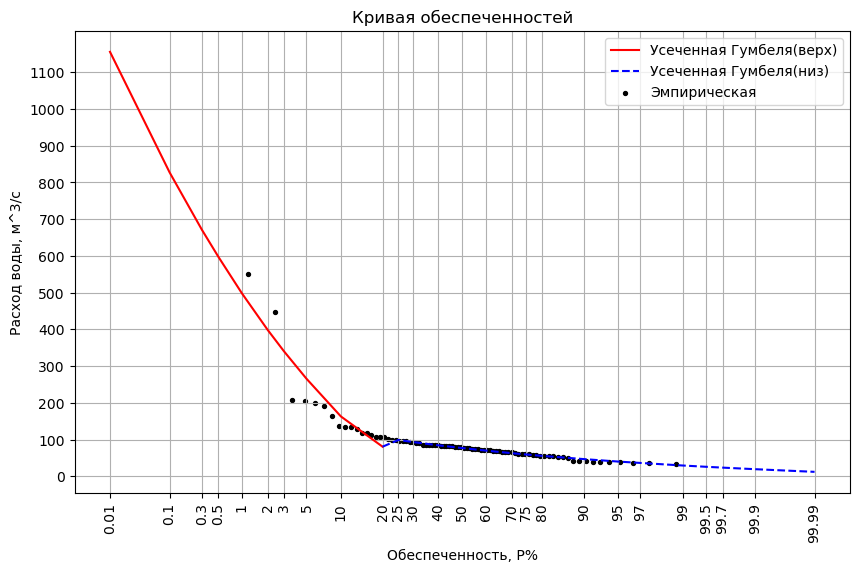

In [33]:

coordinates_upper['Qp'][9] = round((slope_upper * coordinates_upper['g'][9] + intercept_upper + slope_lower * coordinates_upper['g'][9] + intercept_lower) / 2,2)

x_coord = [-3.719016485, -3.090232306, -2.747781385, -2.575829304, -2.326347874,-2.053748911,-1.880793608, -1.644853627, -1.281551566, -0.841621234, -0.67448975, -0.524400513, -0.253347103, 0, 0.253347103, 0.524400513, 0.67448975, 0.841621234, 1.281551566, 1.644853627, 1.880793608, 2.326347874, 2.575829304, 2.747781385, 3.090232306, 3.719016485]
y_coord = pd.concat([coordinates_upper['Qp'], coordinates_lower['Qp']])

xticks_combined = [0.01, 0.1, 0.3, 0.5, 1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 60, 70, 75, 80, 90, 95, 97, 99, 99.5, 99.7, 99.9, 99.99]

plt.figure(figsize=(10, 6))
plt.plot(x_coord[0:10], y_coord[0:10], label="Усеченная Гумбеля(верх)", c='red')
plt.plot(x_coord[9:], y_coord[9:], label="Усеченная Гумбеля(низ)", linestyle="--", c='blue')

plt.scatter(x_empiric,df_for_summary['Ранжированные Qв, м3/с'], label="Эмпирическая",s=8,c='black')

plt.xlabel("Обеспеченность, Р%")
plt.ylabel("Расход воды, м^3/с")
plt.title("Кривая обеспеченностей")

plt.xticks(x_coord, xticks_combined, rotation=90)

y_tick_interval = 100  # Установить нужный интервал !!!
min_value_y = 0
max_value_y = max(y_coord)
ytick_positions = list(range(int(min_value_y), int(max_value_y) + 2, y_tick_interval))
plt.yticks(ytick_positions)

plt.legend()
plt.grid()
plt.show()

In [34]:
coordinates_upper

,P_аналитич,1-P,g,Qp
0,0.01,0.9999,9.21,1155.52
1,0.10,0.9990,6.91,827.51
2,0.30,0.9970,5.81,670.63
3,0.50,0.9950,5.30,597.90
4,1.00,0.9900,4.60,498.07
5,2.00,0.9800,3.90,398.24
6,3.00,0.9700,3.49,339.77
7,5.00,0.9500,2.97,265.61
8,10.00,0.9000,2.25,162.93
9,20.00,0.8000,1.50,80.53


In [35]:
slope_upper * coordinates_upper['g'][9] + intercept_upper 

55.97249607250774

In [36]:
 slope_lower * coordinates_upper['g'][9] + intercept_lower

105.07882080024669

In [37]:
Cs_Cv_0_5 = {
    "Р,%": [0.01,0.1,0.3,0.5,1,3,5,10,20,25,30,40,50,60,70,75,80,90,95,97,99,99.5,99.7,99.9],
    "0.0": [1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00],
    "0.1": [1.38, 1.31, 1.28, 1.26, 1.24, 1.19, 1.17, 1.13, 1.08, 1.07, 1.05, 1.02, 0.999, 0.974, 0.947, 0.932, 0.915, 0.872, 0.837, 0.814, 0.772, 0.748, 0.732, 0.7],
    "0.2": [1.76, 1.63, 1.56, 1.53, 1.48, 1.38, 1.33, 1.26, 1.17, 1.13, 1.1, 1.05, 0.997, 0.946, 0.882, 0.862, 0.829, 0.744, 0.676, 0.633, 0.554, 0.511, 0.482, 0.428],
    "0.3": [2.13, 1.95, 1.85, 1.79, 1.72, 1.58, 1.51, 1.39, 1.25, 1.2, 1.16, 1.07, 0.993, 0.915, 0.834, 0.789, 0.74, 0.615, 0.517, 0.458, 0.354, 0.302, 0.269, 0.21],
    "0.4": [2.47, 2.25, 2.12, 2.05, 1.95, 1.78, 1.68, 1.53, 1.35, 1.27, 1.21, 1.1, 0.988, 0.881, 0.769, 0.709, 0.643, 0.48, 0.362, 0.295, 0.189, 0.144, 0.117, 0.076],
    "0.5": [2.74, 2.5, 2.36, 2.28, 2.17, 1.97, 1.86, 1.67, 1.44, 1.35, 1.27, 1.12, 0.98, 0.839, 0.693, 0.615, 0.533, 0.343, 0.221, 0.16, 0.08, 0.051, 0.037, 0.019],
    "0.6": [2.91, 2.69, 2.55, 2.48, 2.37, 2.16, 2.03, 1.83, 1.56, 1.45, 1.34, 1.15, 0.962, 0.78, 0.596, 0.503, 0.409, 0.215, 0.113, 0.07, 0.025, 0.013, 0.008, 0.003],
    "0.7": [2.89, 2.74, 2.64, 2.59, 2.5, 2.33, 2.22, 2.01, 1.7, 1.56, 1.42, 1.16, 0.92, 0.69, 0.476, 0.376, 0.282, 0.115, 0.047, 0.024, 0.006, 0.002, 0.001, 0],
}

# Создаем DataFrame из словаря
Cs_Cv_0_5 = pd.DataFrame(Cs_Cv_0_5)
Cs_Cv_0_5

,"Р,%",0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7
0,0.01,1.0,1.380,1.760,2.130,2.470,2.740,2.910,2.890
1,0.10,1.0,1.310,1.630,1.950,2.250,2.500,2.690,2.740
2,0.30,1.0,1.280,1.560,1.850,2.120,2.360,2.550,2.640
3,0.50,1.0,1.260,1.530,1.790,2.050,2.280,2.480,2.590
4,1.00,1.0,1.240,1.480,1.720,1.950,2.170,2.370,2.500
5,3.00,1.0,1.190,1.380,1.580,1.780,1.970,2.160,2.330
6,5.00,1.0,1.170,1.330,1.510,1.680,1.860,2.030,2.220
7,10.00,1.0,1.130,1.260,1.390,1.530,1.670,1.830,2.010
8,20.00,1.0,1.080,1.170,1.250,1.350,1.440,1.560,1.700
9,25.00,1.0,1.070,1.130,1.200,1.270,1.350,1.450,1.560


In [38]:
Cs_Cv_1 = {
    "Р,%": [0.01,0.1,0.3,0.5,1,3,5,10,20,25,30,40,50,60,70,75,80,90,95,97,99,99.5,99.7,99.9],
    "0.1": [1.38,1.32,1.28,1.27,1.24,1.19,1.17,1.13,1.08,1.07,1.05,1.02,0.998,0.973,0.946,0.932,0.915,0.873,0.838,0.816,0.775,0.752,0.737,0.707],
    "0.2": [1.81,1.67,1.59,1.55,1.49,1.39,1.34,1.26,1.17,1.13,1.1,1.04,0.993,0.943,0.89,0.861,0.829,0.748,0.683,0.642,0.568,0.528,0.502,0.451],
    "0.3": [2.26,2.03,1.91,1.84,1.76,1.6,1.52,1.4,1.25,1.2,1.15,1.06,0.985,0.909,0.83,0.787,0.74,0.623,0.533,0.478,0.383,0.335,0.303,0.247],
    "0.4": [2.7,2.4,2.23,2.15,2.03,1.82,1.7,1.54,1.34,1.26,1.2,1.08,0.972,0.87,0.764,0.708,0.648,0.5,0.392,0.329,0.229,0.182,0.154,0.108],
    "0.5": [3.15,2.77,2.56,2.46,2.3,2.04,1.9,1.68,1.42,1.33,1.24,1.09,0.954,0.824,0.692,0.622,0.549,0.378,0.263,0.202,0.115,0.081,0.062,0.036],
    "0.6": [3.57,3.13,2.89,2.77,2.59,2.27,2.1,1.83,1.51,1.39,1.29,1.1,0.928,0.768,0.609,0.528,0.445,0.264,0.157,0.107,0.047,0.028,0.019,0.008],
    "0.7": [3.95,3.48,3.21,3.08,2.88,2.5,2.3,1.99,1.6,1.46,1.33,1.1,0.891,0.698,0.515,0.426,0.338,0.165,0.081,0.048,0.015,0.008,0.004,0.001],
    "0.8": [4.31,3.82,3.53,3.38,3.16,2.75,2.53,2.16,1.7,1.52,1.37,1.08,0.836,0.613,0.413,0.321,0.237,0.092,0.036,0.018,0.004,0.002,0.001,0],
    "0.9": [4.64,4.13,3.84,3.69,3.46,3.01,2.76,2.35,1.8,1.59,1.39,1.05,0.76,0.512,0.309,0.224,0.151,0.045,0.013,0.005,0.001,0,0,0],
    "1.0": [4.92,4.42,4.14,3.99,3.75,3.29,3.02,2.55,1.9,1.64,1.4,0.995,0.665,0.406,0.215,0.144,0.088,0.019,0.004,0.001,0,0,0,0],
    "1.1": [5.16,4.69,4.44,4.29,4.06,3.59,3.31,2.78,2,1.68,1.39,0.916,0.559,0.306,0.141,0.086,0.047,0.007,0.001,0,0,0,0,0],
    "1.2": [5.34,4.92,4.74,4.58,4.36,3.92,3.63,3.03,2.1,1.69,1.34,0.808,0.446,0.216,0.085,0.046,0.023,0.002,0,0,0,0,0,0],
    "1.3": [5.46,5.06,4.92,4.75,4.55,4.14,3.84,3.26,2.2,1.7,1.26,0.72,0.34,0.19,0.06,0.025,0.015,0,0,0,0,0,0,0],
    "1.4": [5.58,5.18,5.06,4.91,4.72,4.33,4.02,3.46,2.32,1.7,1.17,0.6,0.26,0.13,0.045,0.02,0.005,0,0,0,0,0,0,0],
    "1.5": [5.68,5.29,5.16,5.02,4.84,4.46,4.16,3.64,2.44,1.68,1.07,0.5,0.2,0.1,0.035,0.01,0,0,0,0,0,0,0,0],
    "1.6": [5.76,5.37,5.24,5.11,4.94,4.58,4.28,3.81,2.56,1.66,0.96,0.38,0.15,0.075,0.025,0.005,0,0,0,0,0,0,0,0],
    "1.7": [5.82,5.44,5.31,5.18,5.00,4.68,4.40,3.94,2.67,1.61,0.84,0.28,0.105,0.055,0.015,0,0,0,0,0,0,0,0,0],
    "1.8": [5.88,5.49,5.36,5.24,5.07,4.76,4.5,4.05,2.8,1.56,0.72,0.2,0.07,0.035,0.01,0,0,0,0,0,0,0,0,0],
    "1.9": [5.92,5.54,5.42,5.28,5.12,4.84,4.6,4.15,2.92,1.51,0.6,0.11,0.04,0.015,0,0,0,0,0,0,0,0,0,0],
    "2.0": [5.96,5.58,5.46,5.32,5.16,4.92,4.69,4.25,3.03,1.46,0.45,0.04,0.01,0,0,0,0,0,0,0,0,0,0,0],
}
# Создаем DataFrame из словаря
Cs_Cv_1 = pd.DataFrame(Cs_Cv_1)
Cs_Cv_1
# Получите длину каждого списка значений
lengths = {key: len(value) for key, value in Cs_Cv_1.items()}

# Выведите результат
print(lengths)

{'Р,%': 24, '0.1': 24, '0.2': 24, '0.3': 24, '0.4': 24, '0.5': 24, '0.6': 24, '0.7': 24, '0.8': 24, '0.9': 24, '1.0': 24, '1.1': 24, '1.2': 24, '1.3': 24, '1.4': 24, '1.5': 24, '1.6': 24, '1.7': 24, '1.8': 24, '1.9': 24, '2.0': 24}


In [39]:
Cs_Cv_2 ={
    "Р,%": [0.01,0.1,0.3,0.5,1,3,5,10,20,25,30,40,50,60,70,75,80,90,95,97,99,99.5,99.7,99.9],
    "0.1": [1.42,1.34,1.3,1.28,1.25,1.2,1.17,1.13,1.08,1.06,1.05,1.02,0.997,0.972,0.945,0.931,0.915,0.873,0.842,0.821,0.782,0.761,0.748,0.719,],
    "0.2": [1.92,1.73,1.64,1.59,1.52,1.41,1.35,1.26,1.16,1.13,1.09,1.04,0.986,0.938,0.886,0.858,0.83,0.754,0.696,0.66,0.594,0.56,0.537,0.492,],
    "0.3": [2.52,2.19,2.02,1.94,1.82,1.64,1.54,1.4,1.24,1.18,1.13,1.05,0.97,0.898,0.823,0.784,0.745,0.64,0.565,0.517,0.436,0.394,0.374,0.319,],
    "0.4": [3.2,2.7,2.45,2.32,2.16,1.87,1.74,1.54,1.31,1.23,1.16,1.05,0.948,0.852,0.76,0.708,0.656,0.532,0.448,0.392,0.304,0.269,0.24,0.192,],
    "0.5": [3.98,3.27,2.91,2.74,2.51,2.13,1.94,1.67,1.38,1.28,1.19,1.04,0.918,0.803,0.691,0.634,0.574,0.436,0.342,0.288,0.206,0.166,0.144,0.107,],
    "0.6": [4.85,3.87,3.42,3.2,2.89,2.39,2.15,1.8,1.44,1.31,1.21,1.03,0.886,0.748,0.622,0.556,0.496,0.352,0.256,0.202,0.13,0.099,0.082,0.052,],
    "0.7": [5.81,4.56,3.96,3.68,3.29,2.66,2.36,1.94,1.5,1.34,1.22,1.01,0.846,0.692,0.552,0.489,0.419,0.272,0.181,0.139,0.076,0.054,0.042,0.027,],
    "0.8": [6.85,5.3,4.55,4.19,3.71,2.94,2.57,2.06,1.54,1.37,1.22,0.984,0.8,0.632,0.488,0.416,0.352,0.208,0.12,0.088,0.04,0.027,0.019,0.008,],
    "0.9": [7.98,6.08,5.16,4.74,4.15,3.21,2.78,2.19,1.58,1.38,1.22,0.955,0.748,0.568,0.424,0.352,0.28,0.154,0.082,0.046,0.019,0.012,0.008,0.004,],
    "1.0": [9.21,6.91,5.81,5.3,4.6,3.51,3,2.3,1.61,1.39,1.2,0.916,0.693,0.511,0.357,0.288,0.223,0.15,0.051,0.03,0.01,0.005,0.003,0.001,],
    "1.1": [10.5,7.75,6.47,5.9,5.05,3.8,3.22,2.4,1.62,1.39,1.18,0.87,0.64,0.45,0.3,0.241,0.175,0.074,0.03,0.016,0.005,0.002,0.001,0,],
    "1.2": [11.8,8.65,7.1,6.5,5.53,4.12,3.4,2.5,1.63,1.35,1.14,0.83,0.58,0.39,0.25,0.193,0.13,0.049,0.016,0.008,0.002,0.001,0,0,],
    "1.3": [13.2,9.6,7.98,7.13,6.02,4.42,3.6,2.57,1.62,1.33,1.11,0.77,0.52,0.334,0.203,0.146,0.094,0.03,0.009,0.004,0.001,0,0,0,],
    "1.4": [14.7,10.6,8.7,7.8,6.55,4.71,3.8,2.64,1.61,1.31,1.08,0.725,0.46,0.283,0.155,0.106,0.065,0.016,0.004,0.002,0,0,0,0,],
    "1.5": [16.4,11.6,9.5,8.42,7.08,4.98,3.96,2.7,1.59,1.28,1.04,0.67,0.405,0.234,0.12,0.077,0.046,0.009,0.002,0.001,0,0,0,0,],
    "1.6": [18.2,12.5,10.5,9,7.5,5.2,4,2.7,1.6,1.26,1.015,0.625,0.355,0.19,0.09,0.06,0.035,0.005,0.001,0,0,0,0,0,],
    "1.7": [20.2,13.5,11,9.5,8,5.5,4.3,2.6,1.6,1.24,0.98,0.58,0.31,0.16,0.07,0.05,0.027,0.004,0,0,0,0,0,0,],
    "1.8": [22.2,14.6,11.9,10.1,8.6,5.8,4.5,2.6,1.56,1.22,0.95,0.53,0.265,0.13,0.06,0.04,0.02,0.003,0,0,0,0,0,0,],
    "1.9": [24.4,15.8,12.7,10.8,9.2,6.2,4.7,2.6,1.5,1.2,0.92,0.48,0.23,0.105,0.05,0.03,0.015,0.002,0,0,0,0,0,0,],
    "2.0": [26.6,17,13.6,11.4,9.8,6.5,5,2.6,2.5,1.18,0.89,0.44,0.2,0.085,0.045,0.025,0.01,0.001,0,0,0,0,0,0,],
}
# Создаем DataFrame из словаря
Cs_Cv_2 = pd.DataFrame(Cs_Cv_2)
Cs_Cv_2
# Получите длину каждого списка значений
lengths = {key: len(value) for key, value in Cs_Cv_2.items()}

# Выведите результат
print(lengths)

{'Р,%': 24, '0.1': 24, '0.2': 24, '0.3': 24, '0.4': 24, '0.5': 24, '0.6': 24, '0.7': 24, '0.8': 24, '0.9': 24, '1.0': 24, '1.1': 24, '1.2': 24, '1.3': 24, '1.4': 24, '1.5': 24, '1.6': 24, '1.7': 24, '1.8': 24, '1.9': 24, '2.0': 24}


In [40]:
Cs_Cv_3 = {
    "Р,%": [0.01,0.1,0.3,0.5,1,3,5,10,20,25,30,40,50,60,70,75,80,90,95,97,99,99.5,99.7,99.9],
    "0.1": [1.46,1.36,1.31,1.28,1.25,1.2,1.17,1.13,1.08,1.07,1.05,1.02,0.997,0.972,0.945,0.931,0.915,0.876,0.844,0.825,0.486,0.769,0.756,0.732,],
    "0.2": [2.05,1.81,1.69,1.63,1.55,1.42,1.36,1.26,1.16,1.12,1.09,1.03,0.981,0.993,0.884,0.858,0.83,0.761,0.708,0.675,0.618,0.588,0.568,0.531,],
    "0.3": [2.83,2.35,2.12,2.03,1.9,1.66,1.55,1.4,1.23,1.17,1.12,1.03,0.959,0.89,0.822,0.786,0.748,0.656,0.588,0.548,0.484,0.446,0.422,0.381,],
    "0.4": [3.8,3.01,2.65,2.48,2.26,1.91,1.75,1.52,1.29,1.21,1.14,1.03,0.93,0.843,0.758,0.715,0.669,0.563,0.487,0.443,0.369,0.334,0.312,0.273,],
    "0.5": [4.94,3.74,3.21,2.97,2.66,2.17,1.95,1.65,1.34,1.24,1.15,1.01,0.898,0.794,0.696,0.647,0.596,0.479,0.4,0.355,0.283,0.249,0.228,0.192,],
    "0.6": [6.26,4.56,3.82,3.5,3.07,2.43,2.14,1.76,1.38,1.26,1.16,0.995,0.862,0.745,0.636,0.583,0.528,0.406,0.326,0.282,0.213,0.182,0.163,0.131,],
    "0.7": [7.7,5.44,4.48,4.06,3.5,2.69,2.34,1.87,1.42,1.28,1.16,0.972,0.823,0.695,0.578,0.522,0.465,0.341,0.263,0.221,0.158,0.131,0.114,0.088,],
    "0.8": [9.3,6.38,5.17,4.64,3.96,2.95,2.52,1.97,1.45,1.28,1.15,0.946,0.783,0.646,0.523,0.465,0.407,0.284,0.21,0.171,0.116,0.092,0.079,0.057,],
    "0.9": [11,7.37,5.88,5.24,4.41,3.21,2.7,2.06,1.47,1.29,1.14,0.915,0.741,0.597,0.471,0.412,0.354,0.235,0.166,0.131,0.083,0.064,0.053,0.036,],
    "1.0": [12.8,8.41,6.61,5.84,4.87,3.47,2.88,2.15,1.49,1.29,1.13,0.883,0.699,0.549,0.422,0.363,0.306,0.193,0.129,0.099,0.058,0.043,0.034,0.022,],
    "1.1": [14.8,9.49,7.37,6.47,5.33,3.73,3.05,2.23,1.5,1.28,1.11,0.848,0.656,0.503,0.375,0.318,0.263,0.156,0.1,0.073,0.04,0.028,0.022,0.013,],
    "1.2": [16.8,10.6,8.15,7.1,5.79,3.98,3.22,2.3,1.5,1.27,1.08,0.812,0.614,0.459,0.333,0.277,0.224,0.126,0.076,0.054,0.027,0.018,0.014,0.007,],
    "1.3": [19,11.8,8.94,7.75,6.26,4.2,3.37,2.36,1.5,1.25,1.06,0.775,0.572,0.417,0.293,0.239,0.19,0.1,0.057,0.038,0.017,0.011,0.008,0.004,],
    "1.4": [21.2,13,9.75,8.41,6.74,4.44,3.52,2.42,1.49,1.23,1.03,0.736,0.531,0.377,0.257,0.206,0.16,0.078,0.042,0.027,0.011,0.006,0.004,0.002,],
    "1.5": [23.5,14.2,10.6,9.07,7.21,4.67,3.66,2.47,1.48,1.2,0.997,0.697,0.491,0.339,0.224,0.176,0.133,0.061,0.03,0.018,0.007,0.004,0.002,0.001,],
    "1.6": [25.9,15.4,11.4,9.74,7.68,4.89,3.8,2.51,1.46,1.18,0.964,0.659,0.452,0.304,0.194,0.149,0.11,0.047,0.022,0.012,0.004,0.002,0.001,0,],
    "1.7": [28.4,16.7,12.3,10.4,8.14,5.1,3.92,2.55,1.45,1.15,0.929,0.62,0.415,0.271,0.166,0.125,0.09,0.035,0.015,0.008,0.002,0.001,0,0,],
    "1.8": [31,18,13.1,11.1,8.61,5.31,4.04,2.58,1.42,1.12,0.892,0.581,0.379,0.24,0.142,0.105,0.073,0.026,0.01,0.005,0.001,0,0,0,],
    "1.9": [33.7,19.4,14,11.8,9.07,5.51,4.15,2.6,1.4,1.08,0.855,0.544,0.345,0.212,0.121,0.087,0.059,0.019,0.007,0.003,0.001,0,0,0,],
    "2.0": [36.5,20.8,14.8,12.4,9.53,5.7,4.26,2.62,1.37,1.05,0.818,0.507,0.313,0.186,0.102,0.071,0.047,0.014,0.004,0.002,0,0,0,0,],
}
# Создаем DataFrame из словаря
Cs_Cv_3 = pd.DataFrame(Cs_Cv_3)
Cs_Cv_3
# Получите длину каждого списка значений
lengths = {key: len(value) for key, value in Cs_Cv_3.items()}

# Выведите результат
print(lengths)

{'Р,%': 24, '0.1': 24, '0.2': 24, '0.3': 24, '0.4': 24, '0.5': 24, '0.6': 24, '0.7': 24, '0.8': 24, '0.9': 24, '1.0': 24, '1.1': 24, '1.2': 24, '1.3': 24, '1.4': 24, '1.5': 24, '1.6': 24, '1.7': 24, '1.8': 24, '1.9': 24, '2.0': 24}


In [41]:
Cs_Cv_4 = {
    "Р,%": [0.01,0.1,0.3,0.5,1,3,5,10,20,25,30,40,50,60,70,75,80,90,95,97,99,99.5,99.7,99.9],
    "0.1": [1.5,1.38,1.32,1.29,1.25,1.2,1.17,1.13,1.08,1.07,1.05,1.02,0.997,0.972,0.945,0.931,0.915,0.877,0.846,0.829,0.79,0.776,0.762,0.742,],
    "0.2": [2.18,1.88,1.74,1.67,1.58,1.44,1.36,1.26,1.15,1.12,1.08,1.02,0.976,0.929,0.883,0.858,0.832,0.767,0.719,0.69,0.638,0.612,0.594,0.561,],
    "0.3": [3.17,2.53,2.24,2.12,1.94,1.68,1.56,1.39,1.22,1.16,1.11,1.02,0.95,0.885,0.821,0.788,0.754,0.671,0.611,0.576,0.516,0.485,0.466,0.43,],
    "0.4": [4.43,3.29,2.82,2.61,2.31,1.93,1.75,1.51,1.27,1.19,1.12,1.01,0.92,0.839,0.761,0.722,0.681,0.586,0.519,0.481,0.417,0.386,0.366,0.331,],
    "0.5": [5.91,4.15,3.44,3.13,2.75,2.18,1.94,1.62,1.31,1.21,1.13,0.996,0.888,0.793,0.704,0.66,0.614,0.511,0.44,0.4,0.336,0.035,0.286,0.252,],
    "0.6": [7.58,5.07,4.09,3.68,3.17,2.43,2.12,1.72,1.34,1.23,1.13,0.976,0.853,0.747,0.649,0.601,0.553,0.444,0.372,0.332,0.269,0.239,0.221,0.189,],
    "0.7": [9.41,6.05,4.79,4.26,3.59,2.68,2.29,1.81,1.37,1.24,1.13,0.954,0.818,0.702,0.597,0.546,0.496,0.384,0.312,0.274,0.214,0.186,0.17,0.141,],
    "0.8": [11.4,7.08,5.5,4.85,4.03,2.92,2.46,1.9,1.4,1.24,1.12,0.929,0.781,0.658,0.548,0.495,0.443,0.331,0.261,0.224,0.168,0.144,0.129,0.104,],
    "0.9": [13.4,8.15,6.22,5.43,4.47,3.16,2.62,1.98,1.41,1.24,1.11,0.902,0.744,0.614,0.501,0.448,0.395,0.284,0.217,0.182,0.132,0.11,0.097,0.075,],
    "1.0": [15.5,9.26,6.96,6.03,4.91,3.39,2.78,2.05,1.42,1.24,1.1,0.873,0.707,0.572,0.457,0.403,0.351,0.243,0.18,0.147,0.102,0.083,0.072,0.054,],
    "1.1": [17.9,10.4,7.73,6.65,5.34,3.62,2.93,2.12,1.43,1.23,1.08,0.843,0.67,0.532,0.416,0.362,0.311,0.207,0.148,0.119,0.078,0.062,0.053,0.038,],
    "1.2": [20.3,11.6,8.53,7.29,5.79,3.83,3.07,2.18,1.44,1.22,1.06,0.812,0.634,0.494,0.377,0.325,0.274,0.176,0.121,0.095,0.06,0.046,0.038,0.026,],
    "1.3": [22.8,12.8,9.31,7.91,6.22,4.04,3.21,2.24,1.43,1.21,1.04,0.781,0.598,0.457,0.341,0.29,0.242,0.148,0.098,0.075,0.045,0.034,0.027,0.018,],
    "1.4": [25.4,14,10.1,8.53,6.66,4.25,3.34,2.28,1.43,1.19,1.01,0.748,0.562,0.421,0.308,0.258,0.212,0.125,0.08,0.059,0.034,0.024,0.019,0.012,],
    "1.5": [28,15.3,10.9,9.16,7.09,4.45,3.46,2.32,1.42,1.17,0.985,0.716,0.529,0.388,0.277,0.23,0.185,0.104,0.064,0.046,0.025,0.017,0.013,0.008],
    "1.6": [30.8,16.6,11.7,9.79,7.52,4.64,3.57,2.36,1.41,1.15,0.958,0.684,0.495,0.356,0.248,0.203,0.162,0.087,0.051,0.036,0.018,0.012,0.009,0.005,],
    "1.7": [33.6,17.9,12.5,10.4,7.95,4.83,3.68,2.39,1.39,1.13,0.929,0.652,0.464,0.327,0.223,0.179,0.14,0.072,0.041,0.028,0.013,0.008,0.006,0.003,],
    "1.8": [36.5,19.2,13.3,11,8.37,5.01,3.78,2.42,1.38,1.1,0.9,0.62,0.433,0.299,0.199,0.158,0.122,0.06,0.032,0.021,0.009,0.006,0.004,0.002,],
    "1.9": [39.4,20.6,14.2,11.7,8.78,5.18,3.87,2.44,1.36,1.08,0.871,0.588,0.403,0.273,0.177,0.139,0.105,0.049,0.025,0.016,0.006,0.004,0.003,0.001,],
    "2.0": [42.4,21.9,15,12.3,9.19,5.34,3.96,2.45,1.33,1.05,0.841,0.558,0.375,0.249,0.157,0.121,0.09,0.04,0.019,0.012,0.004,0.003,0.002,0.001,],
}
# Создаем DataFrame из словаря
Cs_Cv_4 = pd.DataFrame(Cs_Cv_4)
Cs_Cv_4
# Получите длину каждого списка значений
lengths = {key: len(value) for key, value in Cs_Cv_4.items()}

# Выведите результат
print(lengths)

{'Р,%': 24, '0.1': 24, '0.2': 24, '0.3': 24, '0.4': 24, '0.5': 24, '0.6': 24, '0.7': 24, '0.8': 24, '0.9': 24, '1.0': 24, '1.1': 24, '1.2': 24, '1.3': 24, '1.4': 24, '1.5': 24, '1.6': 24, '1.7': 24, '1.8': 24, '1.9': 24, '2.0': 24}


In [42]:
Cs_Cv_5 = {
    "Р,%": [0.01,0.1,0.3,0.5,1,3,5,10,20,25,30,40,50,60,70,75,80,90,95,97,99,99.5,99.7,99.9],
    "0.1": [1.54,1.4,1.34,1.31,1.27,1.2,1.17,1.13,1.08,1.06,1.05,1.02,0.99,0.97,0.94,0.93,0.91,0.88,0.84,0.82,0.78,0.76,0.75,0.73,],
    "0.2": [2.34,1.95,1.78,1.7,1.61,1.44,1.36,1.26,1.15,1.11,1.08,1.02,0.97,0.93,0.88,0.86,0.83,0.77,0.73,0.7,0.66,0.63,0.62,0.59,],
    "0.3": [3.43,2.66,2.31,2.16,1.98,1.67,1.55,1.37,1.21,1.15,1.09,1.01,0.94,0.88,0.82,0.79,0.75,0.68,0.63,0.6,0.55,0.52,0.51,0.47,],
    "0.4": [4.91,3.51,2.92,2.69,2.38,1.93,1.74,1.49,1.25,1.17,1.1,1,0.92,0.84,0.77,0.73,0.69,0.61,0.55,0.51,0.45,0.42,0.41,0.37,],
    "0.5": [6.65,4.44,3.52,3.21,2.79,2.17,1.9,1.6,1.3,1.2,1.1,0.98,0.88,0.79,0.71,0.67,0.63,0.53,0.47,0.43,0.37,0.34,0.32,0.29,],
    "0.6": [8.7,5.4,4.22,3.77,3.21,2.42,2.08,1.7,1.32,1.2,1.11,0.97,0.85,0.75,0.66,0.62,0.57,0.47,0.4,0.36,0.31,0.28,0.26,0.23,],
    "0.7": [10.7,6.43,4.91,4.34,3.65,2.62,2.22,1.79,1.34,1.2,1.1,0.94,0.82,0.71,0.61,0.56,0.52,0.41,0.34,0.31,0.25,0.23,0.21,0.18,],
    "0.8": [12.71,7.54,5.69,4.93,4.06,2.88,2.41,1.86,1.36,1.22,1.1,0.92,0.78,0.67,0.56,0.51,0.47,0.36,0.29,0.26,0.2,0.18,0.16,0.14,],
    "0.9": [15.05,8.64,6.41,5.52,4.5,3.1,2.54,1.94,1.36,1.22,1.09,0.9,0.75,0.63,0.52,0.47,0.42,0.32,0.25,0.22,0.16,0.14,0.12,0.1,],
    "1.0": [17.5,9.73,7.12,6.1,4.89,3.32,2.71,2,1.39,1.12,1.08,0.87,0.714,0.588,0.479,0.428,0.378,0.274,0.211,0.178,0.131,0.11,0.098,0.078,],
    "1.1": [20,10.9,7.87,6.7,5.31,3.53,2.85,2.06,1.4,1.21,1.06,0.843,0.68,0.55,0.44,0.389,0.339,0.238,0.178,0.148,0.105,0.087,0.076,0.059,],
    "1.2": [22.6,12.1,8.63,7.3,5.73,3.73,2.98,2.11,1.4,1.2,1.04,0.815,0.647,0.514,0.403,0.353,0.304,0.206,0.15,0.122,0.083,0.067,0.058,0.044,],
    "1.3": [25.4,13.3,9.4,7.9,6.14,3.93,3.1,2.16,1.4,1.19,1.03,0.786,0.614,0.48,0.369,0.319,0.272,0.178,0.126,0.101,0.066,0.052,0.044,0.032,],
    "1.4": [28.3,14.6,10.2,8.5,6.54,4.1,3.21,2.2,1.39,1.17,1,0.758,0.584,0.45,0.341,0.292,0.246,0.157,0.109,0.085,0.054,0.042,0.035,0.025,],
    "1.5": [31.2,15.8,11,9.12,6.97,4.3,3.33,2.24,1.39,1.16,0.981,0.728,0.551,0.416,0.303,0.261,0.217,0.133,0.088,0.068,0.041,0.031,0.025,0.017,],
    "1.6": [34.1,17.1,11.7,9.71,7.37,4.48,3.44,2.28,1.38,1.14,0.957,0.699,0.52,0.387,0.281,0.235,0.193,0.114,0.073,0.055,0.032,0.023,0.019,0.012,],
    "1.7": [37.1,18.4,12.5,10.3,7.77,4.65,3.53,2.31,1.37,1.12,0.932,0.67,0.491,0.359,0.256,0.212,0.171,0.098,0.061,0.045,0.025,0.018,0.014,0.009,],
    "1.8": [40.1,19.7,13.3,10.9,8.16,4.61,3.62,2.33,1.35,1.1,0.906,0.641,0.463,0.323,0.232,0.19,0.152,0.084,0.05,0.036,0.019,0.013,0.01,0.006,],
    "1.9": [43.2,21,14.1,11.6,8.54,4.97,3.71,2.35,1.33,1.07,0.88,0.613,0.435,0.308,0.211,0.171,0.135,0.071,0.042,0.029,0.015,0.01,0.008,0.004,],
    "2.0": [46.3,22.4,14.9,12.1,8.92,5.12,3.79,2.36,1.32,1.05,0.854,0.586,0.409,0.284,0.191,0.153,0.119,0.061,0.034,0.023,0.011,0.007,0.006,0.003,],
}
# Создаем DataFrame из словаря
Cs_Cv_5 = pd.DataFrame(Cs_Cv_5)
Cs_Cv_5
# Получите длину каждого списка значений
lengths = {key: len(value) for key, value in Cs_Cv_5.items()}

# Выведите результат
print(lengths)

{'Р,%': 24, '0.1': 24, '0.2': 24, '0.3': 24, '0.4': 24, '0.5': 24, '0.6': 24, '0.7': 24, '0.8': 24, '0.9': 24, '1.0': 24, '1.1': 24, '1.2': 24, '1.3': 24, '1.4': 24, '1.5': 24, '1.6': 24, '1.7': 24, '1.8': 24, '1.9': 24, '2.0': 24}


In [132]:
Cs_Cv_6 = {
    #"Р,%": [0.01,0.1,0.3,0.5,1,3,5,10,20,25,30,40,50,60,70,75,80,90,95,97,99,99.5,99.7,99.9],
    "0.1": [1.6,1.41,1.35,1.32,1.29,1.21,1.18,1.14,1.08,1.07,1.04,1.02,0.99,0.96,0.94,0.93,0.91,0.88,0.85,0.83,0.8,0.78,0.76,0.75,],
    "0.2": [2.48,2.02,1.83,1.74,1.63,1.45,1.37,1.26,1.14,1.1,1.07,1.02,0.97,0.92,0.88,0.86,0.84,0.78,0.74,0.72,0.67,0.65,0.64,0.61,],
    "0.3": [3.75,2.8,2.38,2.22,2.01,1.68,1.55,1.37,1.19,1.13,1.08,1.01,0.94,0.88,0.83,0.8,0.77,0.7,0.65,0.62,0.57,0.55,0.53,0.5,],
    "0.4": [5.48,3.68,2.98,2.73,2.4,1.92,1.73,1.47,1.23,1.16,1.1,0.99,0.91,0.84,0.77,0.74,0.7,0.62,0.56,0.53,0.48,0.45,0.43,0.4,],
    "0.5": [7.3,4.58,3.64,3.26,2.81,2.14,1.89,1.56,1.27,1.18,1.1,0.98,0.88,0.8,0.72,0.68,0.64,0.55,0.49,0.46,0.4,0.37,0.36,0.33,],
    "0.6": [9.39,5.54,4.31,3.82,3.22,2.38,2.05,1.66,1.3,1.19,1.1,0.96,0.85,0.76,0.67,0.63,0.58,0.49,0.43,0.39,0.33,0.31,0.29,0.26,],
    "0.7": [11.5,6.57,5,4.38,3.63,2.6,2.2,1.73,1.32,1.2,1.1,0.94,0.82,0.72,0.63,0.58,0.53,0.43,0.37,0.33,0.28,0.25,0.24,0.21,],
    "0.8": [13.8,7.63,5.66,4.93,4.03,2.82,2.36,1.82,1.34,1.21,1.09,0.92,0.79,0.68,0.58,0.53,0.48,0.38,0.32,0.28,0.23,0.2,0.19,0.16,],
    "0.9": [16.4,8.79,6.38,5.51,4.44,3.04,2.51,1.9,1.36,1.2,1.08,0.89,0.75,0.64,0.54,0.49,0.44,0.33,0.27,0.24,0.19,0.17,0.15,0.12,],
    "1.0": [18.8,9.97,7.18,6.11,4.85,3.26,2.66,1.96,1.37,1.2,1.07,0.87,0.72,0.598,0.493,0.443,0.395,0.293,0.231,0.199,0.151,0.129,0.117,0.096,],
    "1.1": [21.4,11.1,7.92,6.69,5.26,3.46,2.79,2.02,1.38,1.2,1.06,0.844,0.688,0.562,0.455,0.406,0.357,0.257,0.198,0.167,0.123,0.104,0.092,0.074,],
    "1.2": [24,12.3,8.67,7.28,5.67,3.66,2.92,2.07,1.38,1.19,1.04,0.818,0.656,0.528,0.42,0.371,0.323,0.226,0.169,0.141,0.1,0.083,0.073,0.057,],
    "1.3": [26.8,13.6,9.42,7.86,6.07,3.85,3.04,2.12,1.38,1.18,1.02,0.791,0.625,0.495,0.387,0.338,0.291,0.198,0.145,0.118,0.081,0.066,0.057,0.044,],
    "1.4": [29.6,14.8,10.2,8.45,6.46,4.03,3.15,2.16,1.38,1.16,1,0.764,0.594,0.464,0.357,0.309,0.263,0.173,0.123,0.099,0.066,0.053,0.045,0.033,],
    "1.5": [32.6,16,10.9,9.04,6.85,4.2,3.25,2.2,1.37,1.15,0.973,0.736,0.565,0.434,0.328,0.281,0.237,0.152,0.105,0.083,0.053,0.042,0.035,0.025,],
    "1.6": [35.7,17.3,11.7,9.61,7.24,4.37,3.35,2.23,1.36,1.13,0.957,0.703,0.536,0.406,0.302,0.256,0.213,0.132,0.089,0.069,0.043,0.033,0.027,0.019,],
    "1.7": [39.1,18.6,12.5,10.2,7.59,4.51,3.43,2.25,1.35,1.11,0.935,0.684,0.511,0.382,0.28,0.236,0.195,0.188,0.078,0.06,0.036,0.027,0.022,0.015,],
    "1.8": [41.9,19.9,13,10.7,7.96,4.68,3.53,2.28,1.34,1.09,0.91,0.655,0.481,0.353,0.353,0.211,0.172,0.1,0.064,0.048,0.027,0.02,0.016,0.011,],
    "1.9": [45.1,21.2,14,11.3,8.35,4.83,3.6,2.29,1.32,1.07,0.887,0.63,0.456,0.33,0.233,0.192,0.155,0.088,0.055,0.04,0.022,0.016,0.013,0.008,],
    "2.0": [48.4,22.5,14.7,11.9,8.71,4.97,3.68,2.31,1.31,1.05,0.863,0.604,0.432,0.308,0.214,0.175,0.139,0.076,0.046,0.033,0.018,0.012,0.01,0.006,],
}
# Создаем DataFrame из словаря
Cs_Cv_6 = pd.DataFrame(Cs_Cv_6)
Cs_Cv_6
# Получите длину каждого списка значений
lengths = {key: len(value) for key, value in Cs_Cv_6.items()}

# Выведите результат
print(lengths)

{'0.1': 24, '0.2': 24, '0.3': 24, '0.4': 24, '0.5': 24, '0.6': 24, '0.7': 24, '0.8': 24, '0.9': 24, '1.0': 24, '1.1': 24, '1.2': 24, '1.3': 24, '1.4': 24, '1.5': 24, '1.6': 24, '1.7': 24, '1.8': 24, '1.9': 24, '2.0': 24}


In [44]:
def interpolate(Cs_Cv, Cv):
    # Пройдитесь по всем ключам (Cs/Cv) в словаре
    for key, value in Cs_Cv.items():
        try:
            # Преобразуйте ключ в число (предполагается, что ключи могут быть преобразованы в число)
            key_as_float = float(key)
            if key_as_float == Cv:
                return Cs_Cv["Р,%"], value
        except ValueError:
            continue

    return None  # Возвращайте None, если значение не найдено

interpolate(Cs_Cv_5, 0.5)

(0      0.01
 1      0.10
 2      0.30
 3      0.50
 4      1.00
 5      3.00
 6      5.00
 7     10.00
 8     20.00
 9     25.00
 10    30.00
 11    40.00
 12    50.00
 13    60.00
 14    70.00
 15    75.00
 16    80.00
 17    90.00
 18    95.00
 19    97.00
 20    99.00
 21    99.50
 22    99.70
 23    99.90
 Name: Р,%, dtype: float64,
 0     6.65
 1     4.44
 2     3.52
 3     3.21
 4     2.79
 5     2.17
 6     1.90
 7     1.60
 8     1.30
 9     1.20
 10    1.10
 11    0.98
 12    0.88
 13    0.79
 14    0.71
 15    0.67
 16    0.63
 17    0.53
 18    0.47
 19    0.43
 20    0.37
 21    0.34
 22    0.32
 23    0.29
 Name: 0.5, dtype: float64)

In [45]:
def interpolate(Cs_Cv, Cv):
    # Пройдитесь по всем ключам (Cs/Cv) в словаре
    for key, value in Cs_Cv.items():
        try:
            if float(key) == Cv:
                result = f"Cv: {Cv}\n{'Р,%':<8}{'Модульный коэффициент':<6}\n"
                for percent, val in zip(Cs_Cv["Р,%"], value):
                    result += f"{percent:<10}{val:<6}\n"
                return result
            else:
                cv_values = [float(key) for key in Cs_Cv.keys()]
                # Найти ближайшие значения Cv
                lower_cv = max(value for value in cv_values if value <= Cv)
                upper_cv = min(value for value in cv_values if value >= Cv)

                delta = (upper_cv - lower_cv) /10
                last_digit = int(str(Cv)[-1])
                result_value = lower_cv + (last_digit * delta)
        except ValueError:
            continue

    return "Значение не найдено"

# Пример использования:
result = interpolate(Cs_Cv_5, 0.5)
print(result)


Cv: 0.5
Р,%     Модульный коэффициент
0.01      6.65  
0.1       4.44  
0.3       3.52  
0.5       3.21  
1.0       2.79  
3.0       2.17  
5.0       1.9   
10.0      1.6   
20.0      1.3   
25.0      1.2   
30.0      1.1   
40.0      0.98  
50.0      0.88  
60.0      0.79  
70.0      0.71  
75.0      0.67  
80.0      0.63  
90.0      0.53  
95.0      0.47  
97.0      0.43  
99.0      0.37  
99.5      0.34  
99.7      0.32  
99.9      0.29  



In [46]:
def interpolate(Cs_Cv, Cv):
    cv_values = [float(key) for key in Cs_Cv.keys()]
    if Cv in cv_values:
        # Если точное значение Cv совпадает с каким-либо значением в таблице
        result = f"Cv: {Cv}\n{'Р,%':<8}{'Модульный коэффициент':<6}\n"
        for percent, val in zip(Cs_Cv["Р,%"], Cs_Cv[str(Cv)]):
            result += f"{percent:<8}{val:<6}\n"
        return result

    cv_values.append(Cv)  # Добавляем значение Cv в список
    cv_values.sort()  # Сортируем список

    # Найти ближайшие значения Cv
    

    delta = (upper_cv - lower_cv) / 10
    last_digit = int(str(Cv)[-1])
    result_value = Cs_Cv[str(lower_cv)][last_digit] + (Cs_Cv[str(upper_cv)][last_digit] - Cs_Cv[str(lower_cv)][last_digit]) * (Cv - lower_cv) / delta

    result = f"Cv: {Cv}\n{'Р,%':<8}{'Модульный коэффициент':<6}\n"
    for percent, val in zip(Cs_Cv["Р,%"], Cs_Cv[str(upper_cv)]):
        result += f"{percent:<8}{val:<6}\n"

    return result

# Пример использования:
result = interpolate(Cs_Cv_5, 0.5)
print(result)


ValueError: could not convert string to float: 'Р,%'

In [ ]:
result = interpolate(Cs_Cv_6, 0.42)
print(result)

In [ ]:
def interpolate(Cs_Cv, Cv):
    # Пройдитесь по всем ключам (Cs/Cv) в словаре
    for key, value in Cs_Cv.items():
        try:
            key_as_float = float(key)
            if float(key) == Cv:
                result = f"Cv: {Cv}\n{'Р,%':<8}{'Модульный коэффициент':<6}\n"
                for percent, val in zip(Cs_Cv["Р,%"], value):
                    result += f"{percent:<10}{val:<6}\n"
                return result
            else:
                # Найти ближайшие значения Cv
                cv_index = key_as_float.index(Cv)
                lower_cv = key_as_float[cv_index - 1]
                upper_cv = key_as_float[cv_index + 1]

                delta = (upper_cv - lower_cv) /10
                last_digit = int(str(Cv)[-1])
                result_value = lower_cv + (last_digit * delta)
        except ValueError:
            continue

    return "Значение не найдено"

# Пример использования:
result = interpolate(Cs_Cv_6, 0.5)
print(result)

In [ ]:
def interpolate(Cs_Cv, Cv):
    # Пройдитесь по всем ключам (Cs/Cv) в словаре
    for key, value in Cs_Cv.items():
        try:
            key_as_float = float(key)
            if key_as_float == Cv:
                result = f"Cv: {Cv}\n{'Р,%':<8}{'Модульный коэффициент':<6}\n"
                for percent, val in zip(Cs_Cv["Р,%"], value):
                    result += f"{percent:<10}{val:<6}\n"
                return result
            else:
                cv_values = [float(key) for key in Cs_Cv.keys()]
                cv_index = cv_values.index(Cv)
                lower_cv = cv_values[cv_index - 1]
                upper_cv = cv_values[cv_index]

                delta = (upper_cv - lower_cv) / 10
                last_digit = int(str(Cv)[-1])

                lower_values = Cs_Cv[str(lower_cv)]
                upper_values = Cs_Cv[str(upper_cv)]

                result_value = lower_values[last_digit] + (upper_values[last_digit] - lower_values[last_digit]) * (Cv - lower_cv) / delta

                result = f"Cv: {Cv}\n{'Р,%':<8}{'Модульный коэффициент':<6}\n"
                for percent, val in zip(Cs_Cv["Р,%"], upper_values):
                    result += f"{percent:<10}{val:<6}\n"
                return result

        except ValueError:
            continue

    return "Значение не найдено"

# Пример использования:
result = interpolate(Cs_Cv_6, 0.42)
print(result)


In [ ]:
def interpolate(Cs_Cv, Cv):
    # Пройдитесь по всем ключам (Cs/Cv) в словаре
    for key, value in Cs_Cv.items():
        try:
            key_as_float = float(key)
            if key_as_float == Cv:
                result = f"Cv: {Cv}\n{'Р,%':<8}{'Модульный коэффициент':<6}\n"
                for percent, val in zip(Cs_Cv["Р,%"], value):
                    result += f"{percent:<10}{val:<6}\n"
                return result
            else:
                cv_values = [float(key) for key in Cs_Cv.keys()]
                cv_index = cv_values.index(Cv)
                lower_cv = cv_values[cv_index - 1]
                upper_cv = cv_values[cv_index]

                delta = (upper_cv - lower_cv) / 10
                last_digit = int(str(Cv)[-1])

                lower_values = Cs_Cv[str(lower_cv)]
                upper_values = Cs_Cv[str(upper_cv)]
                
                for i in range(len(cv_index)):
                    result_value[i] = lower_cv + (last_digit * delta)
                
                result = f"Cv: {Cv}\n{'Р,%':<8}{'Модульный коэффициент':<6}\n"
                for percent, val in zip(Cs_Cv["Р,%"], result_value):
                    result += f"{percent:<10}{val:<6}\n"
                return result

        except ValueError:
            continue

    return "Значение не найдено"

# Пример использования:
result = interpolate(Cs_Cv_6, 0.41)
print(result)


In [ ]:
def interpolate(Cs_Cv, Cv):
    # Пройдитесь по всем ключам (Cs/Cv) в словаре
    for key, value in Cs_Cv.items():
        try:
            key_as_float = float(key)
            if key_as_float == Cv:
                result = f"Cv: {Cv}\n{'Р,%':<8}{'Модульный коэффициент':<6}\n"
                for percent, val in zip(Cs_Cv["Р,%"], value):
                    result += f"{percent:<10}{val:<6}\n"
                return result
            else:
                cv_values = [float(key) for key in Cs_Cv.keys()]
                cv_index = cv_values.index(Cv)
                lower_cv = cv_values[cv_index - 1]
                upper_cv = cv_values[cv_index]

                delta = (upper_cv - lower_cv) / 10
                last_digit = int(str(Cv)[-1])

                lower_values = Cs_Cv[str(lower_cv)]
                upper_values = Cs_Cv[str(upper_cv)]
                
                result_values = []

                for i in range(len(lower_values)):
                    result_value = lower_values[i] + (last_digit * delta)
                    result_values.append(result_value)
                
                result = f"Cv: {Cv}\n{'Р,%':<8}{'Модульный коэффициент':<6}\n"
                for percent, val in zip(Cs_Cv["Р,%"], result_values):
                    result += f"{percent:<10}{val:<6}\n"
                return result

        except ValueError:
            continue

    return "Значение не найдено"

# Пример использования:
result = interpolate(Cs_Cv_6, 0.42)
print(result)


In [47]:
Cs_Cv_6

,"Р,%",0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0
0,0.01,1.60,2.48,3.75,5.48,7.30,9.39,11.50,13.80,16.40,...,21.400,24.000,26.800,29.600,32.600,35.700,39.100,41.900,45.100,48.400
1,0.10,1.41,2.02,2.80,3.68,4.58,5.54,6.57,7.63,8.79,...,11.100,12.300,13.600,14.800,16.000,17.300,18.600,19.900,21.200,22.500
2,0.30,1.35,1.83,2.38,2.98,3.64,4.31,5.00,5.66,6.38,...,7.920,8.670,9.420,10.200,10.900,11.700,12.500,13.000,14.000,14.700
3,0.50,1.32,1.74,2.22,2.73,3.26,3.82,4.38,4.93,5.51,...,6.690,7.280,7.860,8.450,9.040,9.610,10.200,10.700,11.300,11.900
4,1.00,1.29,1.63,2.01,2.40,2.81,3.22,3.63,4.03,4.44,...,5.260,5.670,6.070,6.460,6.850,7.240,7.590,7.960,8.350,8.710
5,3.00,1.21,1.45,1.68,1.92,2.14,2.38,2.60,2.82,3.04,...,3.460,3.660,3.850,4.030,4.200,4.370,4.510,4.680,4.830,4.970
6,5.00,1.18,1.37,1.55,1.73,1.89,2.05,2.20,2.36,2.51,...,2.790,2.920,3.040,3.150,3.250,3.350,3.430,3.530,3.600,3.680
7,10.00,1.14,1.26,1.37,1.47,1.56,1.66,1.73,1.82,1.90,...,2.020,2.070,2.120,2.160,2.200,2.230,2.250,2.280,2.290,2.310
8,20.00,1.08,1.14,1.19,1.23,1.27,1.30,1.32,1.34,1.36,...,1.380,1.380,1.380,1.380,1.370,1.360,1.350,1.340,1.320,1.310
9,25.00,1.07,1.10,1.13,1.16,1.18,1.19,1.20,1.21,1.20,...,1.200,1.190,1.180,1.160,1.150,1.130,1.110,1.090,1.070,1.050


In [133]:
for key, value in Cs_Cv_6.items():
    cv_values = [float(key) for key in Cs_Cv_6.keys()]
    cv_index = cv_values.index(0.42)
    lower_cv = cv_values[cv_index - 1]
    upper_cv = cv_values[cv_index]

    delta = (upper_cv - lower_cv) / 10
    last_digit = int(str(Cv)[-1])

    lower_values = Cs_Cv_6[str(lower_cv)]
    upper_values = Cs_Cv_6[str(upper_cv)]

    result_values = []

    for i in range(len(lower_values)):
        result_value = lower_values[i] + (last_digit * delta)
        result_values.append(result_value)

    result = f"Cv: {Cv}\n{'Р,%':<8}{'Модульный коэффициент':<6}\n"
    for percent, val in zip(Cs_Cv["Р,%"], result_values):
        result += f"{percent:<10}{val:<6}\n"

ValueError: 0.42 is not in list

In [144]:
Cv = 0.42
lower_value = 0.0
upper_value = 0.0
val = int(Cv * 100) % 10
if val >= 1:
    upper_value = float(int(Cv * 10) % 10 + 1) / 10
    lower_value = float(int(Cv * 10) % 10) / 10
print("Нижняя граница:", lower_value)
print("Верхняя граница:", upper_value)


Нижняя граница: 0.4
Верхняя граница: 0.5


In [152]:
for key, value in Cs_Cv_6.items():
    delta = (Cs_Cv_6[key][int(upper_value * 10)] - Cs_Cv_6[key][int(lower_value * 10)]) / 10

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [146]:
for key in Cs_Cv_6:
    delta = (Cs_Cv_6[key][int(upper_value * 10)] - Cs_Cv_6[key][int(lower_value * 10)]) / 10
    print(f'Разница для ключа {key}: {delta}')


Разница для ключа 0.1: -0.008000000000000007
Разница для ключа 0.2: -0.017999999999999995
Разница для ключа 0.3: -0.03299999999999999
Разница для ключа 0.4: -0.048
Разница для ключа 0.5: -0.06699999999999999
Разница для ключа 0.6: -0.08400000000000003
Разница для ключа 0.7: -0.10299999999999998
Разница для ключа 0.8: -0.12100000000000004
Разница для ключа 0.9: -0.14000000000000004
Разница для ключа 1.0: -0.15899999999999997
Разница для ключа 1.1: -0.18
Разница для ключа 1.2: -0.20099999999999998
Разница для ключа 1.3: -0.22200000000000003
Разница для ключа 1.4: -0.24299999999999997
Разница для ключа 1.5: -0.26499999999999996
Разница для ключа 1.6: -0.28700000000000003
Разница для ключа 1.7: -0.308
Разница для ключа 1.8: -0.328
Разница для ключа 1.9: -0.352
Разница для ключа 2.0: -0.3740000000000001
